In [1]:
import pandas as pd
import utils

In [9]:
df = pd.read_csv('dataset.csv')

In [10]:
# 자료확인
print(df.columns)
df.tail()

Index(['loan_amnt', 'int_rate', 'grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec',
       'revol_bal', 'total_acc', 'loan_status'],
      dtype='object')


,loan_amnt,int_rate,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,loan_status
218706,15000,18.49,5,1,9,1,90000.0,0,12,3,25.13,1,0,0,4104,21,1
218707,20000,6.24,1,1,10,4,125000.0,1,12,2,14.20,1,0,0,23880,30,1
218708,31050,21.99,6,1,10,1,875000.0,1,12,3,9.66,1,0,0,25770,13,1
218709,9000,9.17,2,1,1,1,80000.0,1,12,3,3.97,1,0,0,6320,17,1
218710,8000,12.59,3,1,4,3,45000.0,1,12,3,26.21,0,0,0,9097,47,1


In [11]:
base_lr = utils.get_logistic(df)

Accuracy: 77.88%


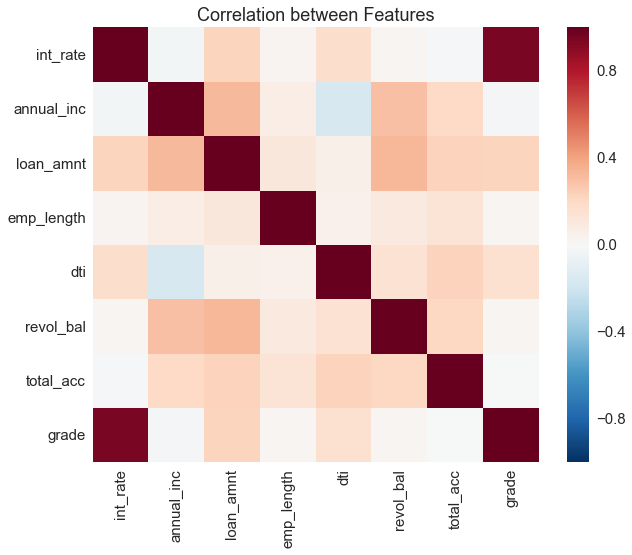

In [12]:
utils.heatmap_display(df)

In [13]:
del df['grade']

In [14]:
df.tail()

,loan_amnt,int_rate,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,loan_status
218706,15000,18.49,1,9,1,90000.0,0,12,3,25.13,1,0,0,4104,21,1
218707,20000,6.24,1,10,4,125000.0,1,12,2,14.20,1,0,0,23880,30,1
218708,31050,21.99,1,10,1,875000.0,1,12,3,9.66,1,0,0,25770,13,1
218709,9000,9.17,1,1,1,80000.0,1,12,3,3.97,1,0,0,6320,17,1
218710,8000,12.59,1,4,3,45000.0,1,12,3,26.21,0,0,0,9097,47,1


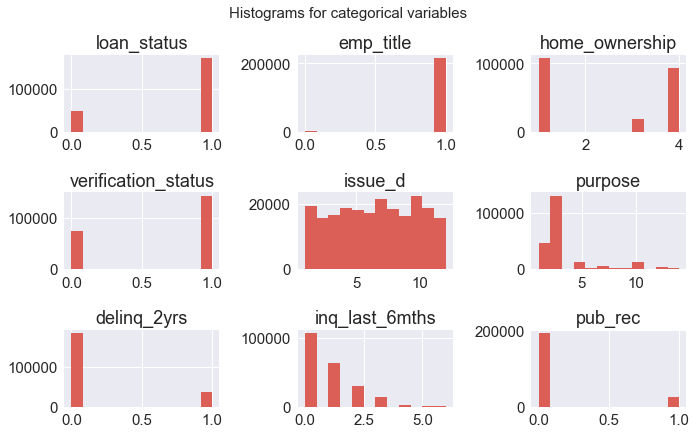

In [15]:
# 범주형 자료 히스토그램
utils.hist_display(df, 'categorical')

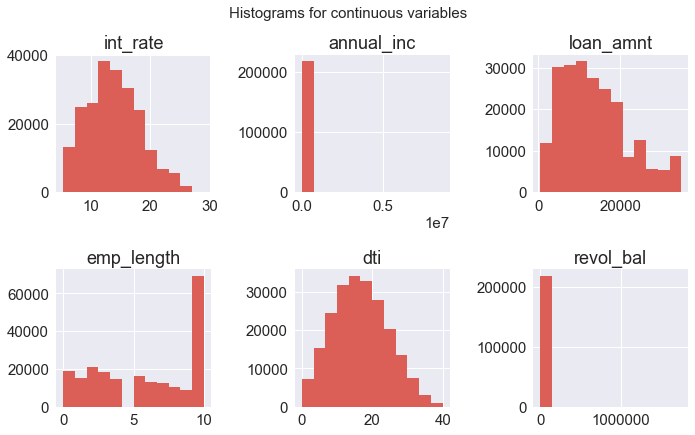

In [16]:
# 연속형 자료 히스토그램
utils.hist_display(df, 'continuous')

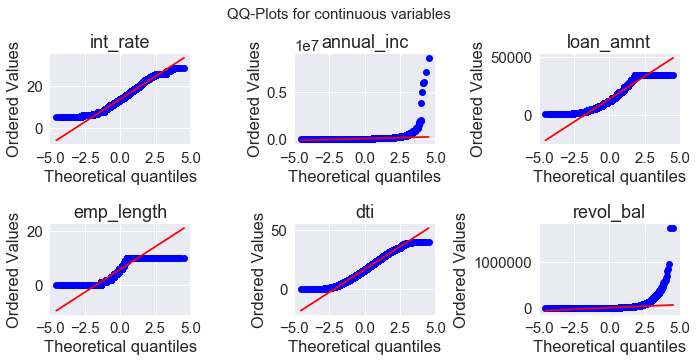

In [17]:
# 연속형 자료 Q-Q plot
utils.qq_display(df)

In [18]:
cleaned_df = utils.remove_outlier(df, 'continuous', 0.001)

The number of outliers(0.1%): 2893


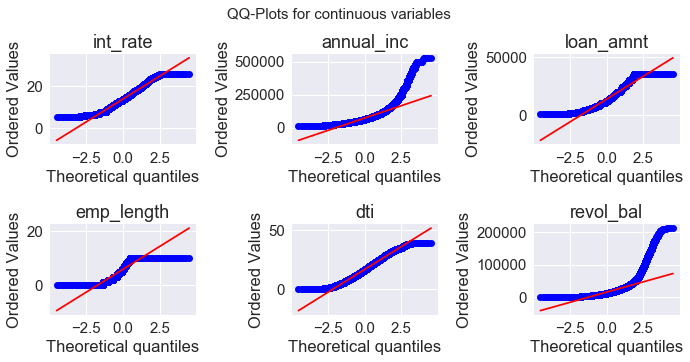

In [19]:
utils.qq_display(cleaned_df)

In [20]:
df.tail()

,loan_amnt,int_rate,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,loan_status
218706,15000,18.49,1,9,1,90000.0,0,12,3,25.13,1,0,0,4104,21,1
218707,20000,6.24,1,10,4,125000.0,1,12,2,14.20,1,0,0,23880,30,1
218708,31050,21.99,1,10,1,875000.0,1,12,3,9.66,1,0,0,25770,13,1
218709,9000,9.17,1,1,1,80000.0,1,12,3,3.97,1,0,0,6320,17,1
218710,8000,12.59,1,4,3,45000.0,1,12,3,26.21,0,0,0,9097,47,1


In [21]:
scaled_df = utils.var_scaler(cleaned_df, feature_range=(0, 10))
scaled_df.tail()

,loan_amnt,int_rate,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,loan_status
215813,8.352941,6.027132,1,10.0,3,1.802326,1,12,3,7.719253,0,0,0,1.313549,3.428571,1
215814,4.117647,6.332364,1,9.0,1,1.511628,0,12,3,6.425467,1,0,0,0.192832,2.571429,1
215815,5.588235,0.397287,1,10.0,4,2.189922,1,12,2,3.630785,1,0,0,1.122033,3.857143,1
215816,2.352941,1.816860,1,1.0,1,1.317829,1,12,3,1.015086,1,0,0,0.296953,2.000000,1
215817,2.058824,3.473837,1,4.0,3,0.639535,1,12,3,6.701611,0,0,0,0.427434,6.285714,1


In [22]:
test = pd.read_csv('test_dataset.csv')
base_test = utils.get_dummy(test)

In [23]:
lr = utils.get_logistic(scaled_df)

Accuracy: 77.08%


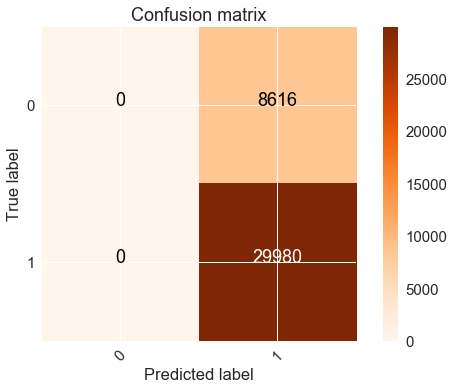

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      8616
          1       0.78      1.00      0.87     29980

avg / total       0.60      0.78      0.68     38596



C:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
# 기본성능
utils.plot_confusion_matrix(base_test, base_lr)

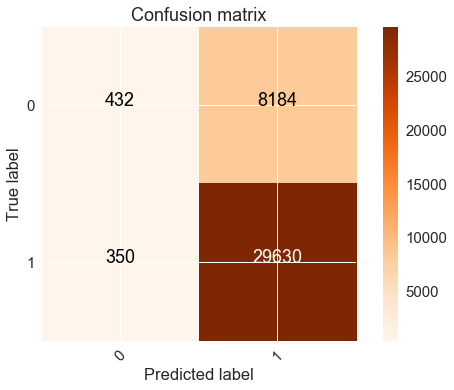

             precision    recall  f1-score   support

          0       0.55      0.05      0.09      8616
          1       0.78      0.99      0.87     29980

avg / total       0.73      0.78      0.70     38596



In [25]:
x_test = utils.prep_data(test)
utils.plot_confusion_matrix(x_test, lr)

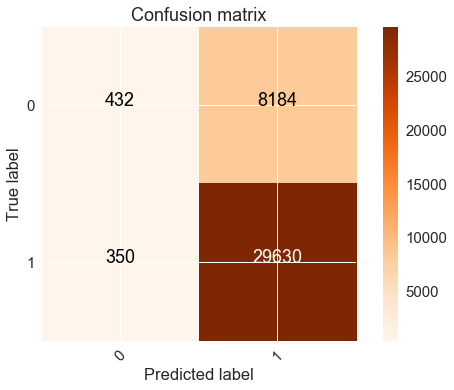

             precision    recall  f1-score   support

          0       0.55      0.05      0.09      8616
          1       0.78      0.99      0.87     29980

avg / total       0.73      0.78      0.70     38596



In [26]:
 # 개선된 성능
x_test = utils.prep_data(test)
utils.plot_confusion_matrix(x_test, lr)

In [27]:
paid, default = df['loan_status'].value_counts()
print(paid, default)

170369 48342
